<a href="https://colab.research.google.com/github/emianaamos/Cotton-Disease-Classification/blob/main/Cotton_Disease_Prediction_RestNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'data/train'
valid_path = 'data/test'

In [ ]:
# Import the resNet 50 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 441s 5us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('data/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 200 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 36 images belonging to 5 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  epochs=10,
  
)

Epoch 1/10
7/7 [==============================] - 67s 9s/step - loss: 3.3137 - accuracy: 0.3150
Epoch 2/10
7/7 [==============================] - 67s 11s/step - loss: 2.4766 - accuracy: 0.2500
Epoch 3/10
7/7 [==============================] - 68s 11s/step - loss: 2.3598 - accuracy: 0.3300
Epoch 4/10
7/7 [==============================] - 70s 10s/step - loss: 1.7287 - accuracy: 0.4000
Epoch 5/10
7/7 [==============================] - 66s 9s/step - loss: 1.2860 - accuracy: 0.4800
Epoch 6/10
7/7 [==============================] - 67s 9s/step - loss: 1.1731 - accuracy: 0.4900
Epoch 7/10
7/7 [==============================] - 70s 10s/step - loss: 1.1225 - accuracy: 0.5050
Epoch 8/10
7/7 [==============================] - 69s 10s/step - loss: 1.1986 - accuracy: 0.5150
Epoch 9/10
7/7 [==============================] - 70s 9s/step - loss: 0.9766 - accuracy: 0.5150
Epoch 10/10
7/7 [==============================] - 69s 10s/step - loss: 0.9774 - accuracy: 0.5800


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
#r = model.fit_generator(
  #training_set,
  #validation_data=test_set,
  #epochs=10,
  #steps_per_epoch=len(training_set),
  #validation_steps=len(test_set)
#)

KeyError: 'val_loss'

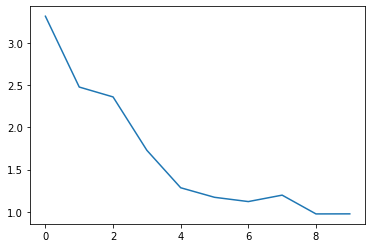

In [ ]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\Emiana Emmanuel\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [ ]:
y_pred = model.predict(test_set)
y_pred

array([[0.21030262, 0.3472577 , 0.2510004 , 0.19143926],
       [0.11558638, 0.5819777 , 0.06950416, 0.23293178],
       [0.10054596, 0.52035534, 0.07044838, 0.30865029],
       [0.206311  , 0.00300551, 0.01027641, 0.78040713],
       [0.2979119 , 0.37395328, 0.04100835, 0.28712654],
       [0.21934795, 0.34786525, 0.25899494, 0.17379178],
       [0.24863178, 0.44083354, 0.09710468, 0.21342999],
       [0.09533516, 0.68453664, 0.00827951, 0.21184874],
       [0.13566512, 0.19275321, 0.503458  , 0.16812354],
       [0.06169533, 0.7575358 , 0.00639544, 0.17437343],
       [0.11663436, 0.56242454, 0.06373984, 0.25720122],
       [0.10303728, 0.63494897, 0.05366848, 0.20834528],
       [0.10124906, 0.57555836, 0.05773884, 0.26545376],
       [0.08086612, 0.65299076, 0.03358573, 0.2325574 ],
       [0.8965276 , 0.00306392, 0.02044897, 0.0799595 ],
       [0.09257472, 0.6048224 , 0.04425791, 0.25834504],
       [0.09371407, 0.23391469, 0.05563184, 0.6167394 ],
       [0.090285  , 0.72192293,

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 3, 1, 1, 3, 1, 2,
       1, 1, 1, 2, 2, 1, 3, 0, 2, 1, 2, 2, 1, 2], dtype=int64)

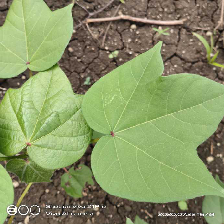

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_resnet50.h5')

img=image.load_img("C:/Users/Emiana Emmanuel/anaconda3/Scripts/Cotton Disease Classification/data/val/fresh cotton leaf/d (7)_iaip.jpg",target_size=(224,224))
img

In [ ]:
x=image.img_to_array(img)
x

array([[[111.,  94.,  84.],
        [111.,  94.,  84.],
        [111.,  94.,  84.],
        ...,
        [147., 124., 110.],
        [199., 173., 160.],
        [224., 197., 176.]],

       [[ 94.,  77.,  67.],
        [ 97.,  80.,  70.],
        [115.,  98.,  88.],
        ...,
        [168., 145., 131.],
        [200., 174., 161.],
        [219., 192., 171.]],

       [[105.,  88.,  78.],
        [125., 108.,  98.],
        [135., 118., 108.],
        ...,
        [157., 134., 120.],
        [206., 180., 167.],
        [211., 184., 163.]],

       ...,

       [[171., 198., 127.],
        [164., 205., 126.],
        [164., 211., 133.],
        ...,
        [155., 173., 133.],
        [139., 157., 117.],
        [139., 155., 108.]],

       [[172., 197., 129.],
        [164., 207., 127.],
        [151., 203., 121.],
        ...,
        [150., 168., 128.],
        [133., 151., 111.],
        [139., 153., 104.]],

       [[165., 203., 130.],
        [165., 203., 130.],
        [154., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.7954394 , 0.00257624, 0.18240651, 0.01957784]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([False])